<hr>
<center>
<h1> Clothing Classification </h1>
<h3> Authored: Tyler Travis<h3>
</center>
<hr>
<h4> Intent: </h4>
<p>
The intent of the Clothing Classification Project is to build my knowledge of machine learning algorithms, by using the popular TensorFlow framework. I will be building a two-layer network, with 10 outputs, outputting its thought on the category the algorithm thinks the article of clothing is.
</p>
<hr>
<h4>Disclaimer: </h4>

This work is followed closely to a [TensorFlow Example](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb) found on their website. By refering to this in assistance of expanding my knowledge of ML, I plan on abiding the MIT License.
<hr>


In [ ]:
# Importing External Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

<h4>Data Ingestion</h4>

In [ ]:
# Importing Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist # built in data set to tensorflow
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Train Images -> 28 x 28 array 
# Train Labels -> 0 to 9, types of classes

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Manually Describing Images
# [0] - T-shirt
# [1] - Trousers
# [2] - Pullover
# [3] - Dress
# [4] - Coat
# [5] - Sandals
# [6] - Shirt
# [7] - Sneaker
# [8] - Bag
# [9] - Ankle Boot

class_names = ["T-shirt", "Trousers", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Sneaker", "Bag", "Ankle Boots"]

In [ ]:
# Looking Into Data a Bit
print("There are {} labels in our set.".format(len(train_labels)))

There are 60000 labels in our set.


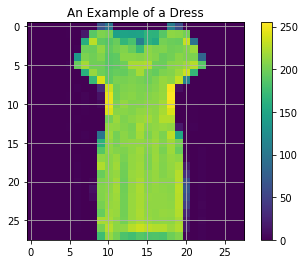

In [ ]:
# Displaying a Dress

plt.figure()
plt.title("An Example of a Dress")
plt.imshow(train_images[20])
plt.colorbar()
plt.grid(True)
plt.show()

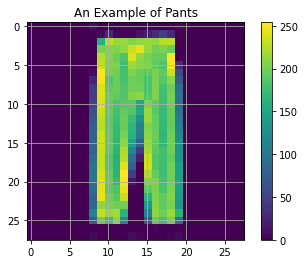

In [ ]:
# An Example of Pants

plt.figure()
plt.title("An Example of Pants")
plt.imshow(train_images[21])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
# Altering to Preprocess Grayscale

def preProcessGrayScale(data):
  return data / 255.0 

train_images = preProcessGrayScale(train_images)
test_images = preProcessGrayScale(test_images)

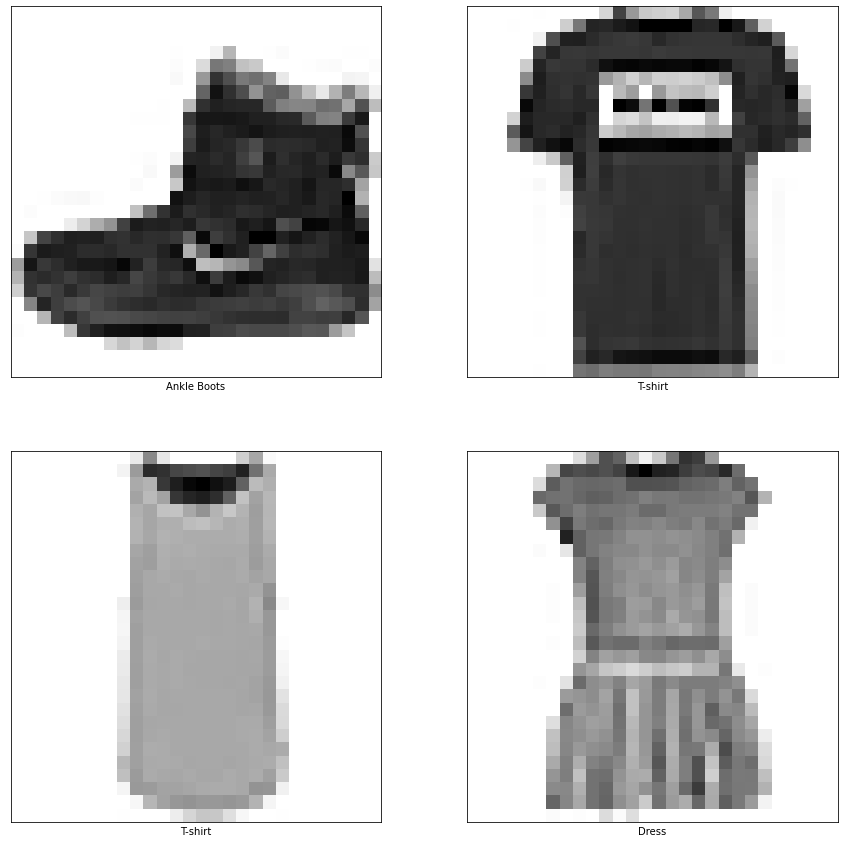

In [ ]:
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<hr>
<h4>Neural Network Building</h4>
We have now identified our data, we have converted it to a grayscale, and validated that our information is correct. Our next step is to build a Neural Network model, and set up the layers accordingly. Eventually we will train the model to accurately predict clothing.
<hr>

In [ ]:
# Building Sequential Machine Learning Model

model = tf.keras.Sequential([
    # Switches 28 x 28 to 1 x 724
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    # Layers that do learning during training.
    # RELU activation function, I'd prefer sigmoid
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Densly connected neural networks
    tf.keras.layers.Dense(10)
])

In [ ]:
# Compiling the Model

model.compile(optimizer='adam', # stochastic gradient descent for training deep learning models
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Which Includes: Feeding Training to Model, Associating Images, Asking to Make Predicitions, Checking Answer

<hr>
<h4>Training Model</h4>
<hr>

In [ ]:
# Training Neural Network
iterations = 25
model.fit(train_images, train_labels, epochs=iterations)

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4998 - accuracy: 0.8251
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8655
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8780
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8848
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.8905
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8963
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9015
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2549 - accuracy: 0.9048
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2458 - accuracy: 0.9086
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

<hr>
<h4>Prediction Making</h4>
<hr>

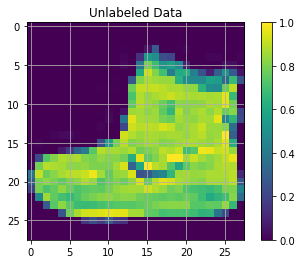

Confidence in T-shirt is 7.21838977479905e-11
Confidence in Trousers is 2.606108789871258e-14
Confidence in Pullover is 6.02536575321222e-13
Confidence in Dress is 1.3038448467437512e-17
Confidence in Coat is 3.460135545234227e-17
Confidence in Sandals is 8.400874662584101e-07
Confidence in Shirt is 7.796243576933815e-13
Confidence in Sneaker is 9.96335584204644e-05
Confidence in Bag is 3.7725737857545634e-15
Confidence in Ankle Boots is 0.9998995065689087


In [ ]:
# Creating a Softmax Layer to Convert Models Linears Outputs
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# Generating Predictions for Entire Dataset
predictions = probability_model.predict(test_images)

convertedPredictions = (list(predictions[0]))

plt.figure()
plt.title("Unlabeled Data")
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

for i in range(len(convertedPredictions)):
  print("Confidence in {} is {}".format(class_names[i], convertedPredictions[i]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

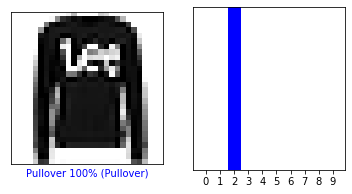

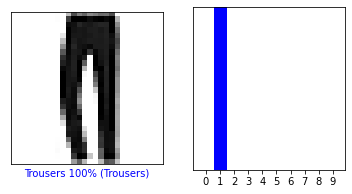

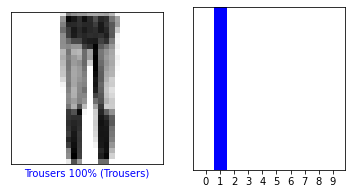

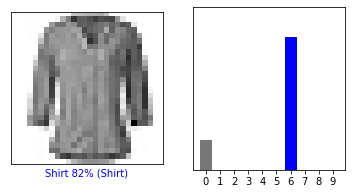

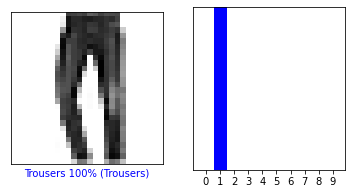

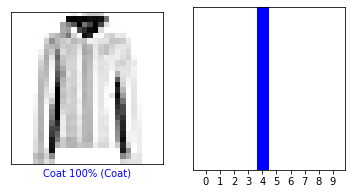

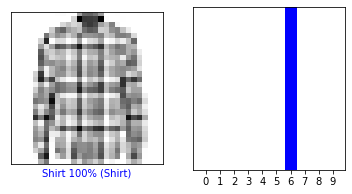

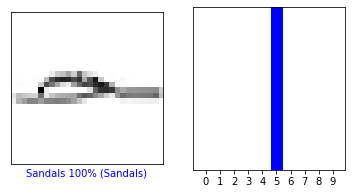

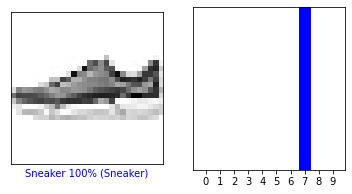

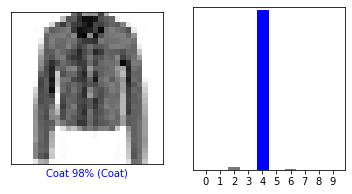

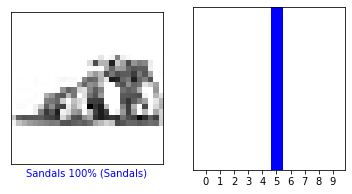

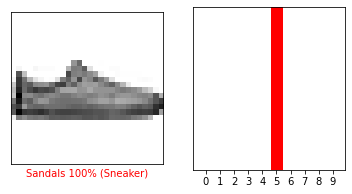

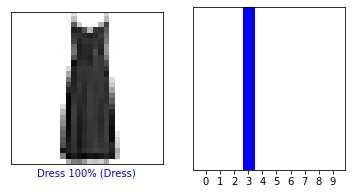

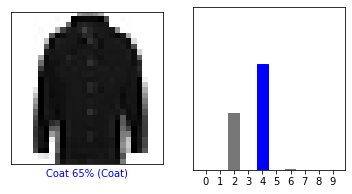

In [ ]:
for i in range(1,15):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()